In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Preprocessed_cleaned_Final_dataset.csv")


#### ****The Dataset Is mostly balanced and no need to perform any imbalanced data handling techniques on it.****

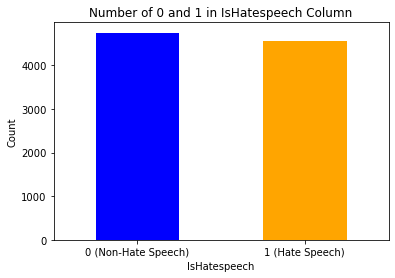

In [3]:
counts = df['IsHatespeech'].value_counts()
counts.plot(kind='bar', color=['blue', 'orange'])


plt.title('Number of 0 and 1 in IsHatespeech Column')
plt.xlabel('IsHatespeech')
plt.ylabel('Count')
plt.xticks([0, 1], ['0 (Non-Hate Speech)', '1 (Hate Speech)'], rotation=0)

plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9310 entries, 0 to 9309
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text          9310 non-null   object
 1   IsHatespeech  9310 non-null   int64 
 2   tokens        9310 non-null   object
 3   clean_text    9307 non-null   object
 4   text_length   9310 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 363.8+ KB


In [5]:
df.head()

,Text,IsHatespeech,tokens,clean_text,text_length
0,frustratingly small please find an image at le...,0,"['frustratingly', 'small', 'please', 'find', '...",frustratingly small please find image least pi...,117
1,padding cell padding class mainpagebg solid ve...,0,"['padding', 'cell', 'padding', 'class', 'mainp...",padding cell padding class mainpagebg solid ve...,1192
2,from the scenarios you present i see you belie...,0,"['scenario', 'present', 'see', 'believe', 'peo...",scenario present see believe people robot abra...,560
3,i have to go inside you tomorrow i hate myself...,0,"['go', 'inside', 'tomorrow', 'hate', 'every', ...",go inside tomorrow hate every time feel cheap ...,51
4,retweet china s bird flu outbreak good signs b...,0,"['retweet', 'china', 'bird', 'flu', 'outbreak'...",retweet china bird flu outbreak good sign bad ...,59


In [6]:
df = df.dropna()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer() 
 
word_count_vector=cv.fit_transform(df['clean_text'])

In [59]:
word_counts = pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names_out())
word_counts_sum = word_counts.sum().sort_values(ascending=False)

words_above_threshold = word_counts_sum[word_counts_sum > 10]


print(words_above_threshold.shape)

(2550,)


#### Testing how much accuracy can be achived by choosing the best hyper-parameter 
#### We split and perform TF-IDF Embedding on it

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer



X = df['clean_text']
y = df['IsHatespeech']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Random Forest alogorithm was able to achive Accuracy: 0.71535 with Hyper Parameter Tunning

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

param_grid = {
    'n_estimators': [25,150,500,1000,5000], 
    'max_features': [1,2,'auto','sqrt', 'log2', None], 
    'max_depth': [3, 6, 9,15,20], 
    'max_leaf_nodes': [3, 6, 9,15,20]
    
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train_tfidf, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test_tfidf)

print("Random Forest Performance with TF-IDF:")
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))



Fitting 5 folds for each of 750 candidates, totalling 3750 fits
Random Forest Performance with TF-IDF:
Best Parameters: {'max_depth': 20, 'max_features': 2, 'max_leaf_nodes': 20, 'n_estimators': 5000}
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72       944
           1       0.71      0.73      0.72       918

    accuracy                           0.72      1862
   macro avg       0.72      0.72      0.72      1862
weighted avg       0.72      0.72      0.72      1862

Accuracy: 0.7223415682062299
AUC-ROC: 0.7224299324249474
Confusion Matrix:
 [[676 268]
 [249 669]]


In [57]:
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

F1 Score: 0.7212938005390834
Precision: 0.7139807897545357
Recall: 0.7287581699346405


### Logistic Regression Model Hyper-tunning parameters


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

logistic_model = LogisticRegression(random_state=42, max_iter=1000)

grid_search_logistic = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search_logistic.fit(X_train_tfidf, y_train)

best_logistic = grid_search_logistic.best_estimator_

y_pred_logistic = best_logistic.predict(X_test_tfidf)

print("Logistic Regression Performance with TF-IDF:")
print("Best Parameters:", grid_search_logistic.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("F1 Score:", f1_score(y_test, y_pred_logistic))
print("Precision:",precision_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Logistic Regression Performance with TF-IDF:
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       944
           1       0.75      0.76      0.75       918

    accuracy                           0.76      1862
   macro avg       0.76      0.76      0.76      1862
weighted avg       0.76      0.76      0.76      1862

Accuracy: 0.7556390977443609
AUC-ROC: 0.755688951663528
Confusion Matrix:
 [[710 234]
 [221 697]]
F1 Score: 0.7539210383991347
Precision: 0.748657357679914
Recall: 0.7592592592592593


C:\Users\shrey\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrey\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\shrey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

### Naive Bayes Model Hyper-tunning parameters


In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 5, 10]
}

naive_bayes_model = MultinomialNB()

grid_search_nb = GridSearchCV(estimator=naive_bayes_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search_nb.fit(X_train_tfidf, y_train)

best_nb = grid_search_nb.best_estimator_

y_pred_nb = best_nb.predict(X_test_tfidf)

print("Naive Bayes Performance with TF-IDF:")
print("Best Parameters:", grid_search_nb.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("Precision:",precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Naive Bayes Performance with TF-IDF:
Best Parameters: {'alpha': 1}
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.75       944
           1       0.73      0.80      0.76       918

    accuracy                           0.75      1862
   macro avg       0.76      0.76      0.75      1862
weighted avg       0.76      0.75      0.75      1862

Accuracy: 0.7545649838882922
AUC-ROC: 0.755139673571877
Confusion Matrix:
 [[674 270]
 [187 731]]
F1 Score: 0.7618551328817093
Precision: 0.7302697302697303
Recall: 0.7962962962962963


### SVM Model Hyper-tunning parameters


In [58]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC(random_state=42, probability=True)

grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search_svm.fit(X_train_tfidf, y_train)

best_svm = grid_search_svm.best_estimator_

y_pred_svm = best_svm.predict(X_test_tfidf)
y_pred_svm_proba = best_svm.predict_proba(X_test_tfidf)[:, 1]

print("SVM Performance with TF-IDF:")
print("Best Parameters:", grid_search_svm.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_svm_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Precision:",precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
SVM Performance with TF-IDF:
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       944
           1       0.75      0.79      0.77       918

    accuracy                           0.77      1862
   macro avg       0.77      0.77      0.77      1862
weighted avg       0.77      0.77      0.77      1862

Accuracy: 0.7663802363050484
AUC-ROC: 0.8326848159226026
Confusion Matrix:
 [[699 245]
 [190 728]]
F1 Score: 0.7699629825489159
Precision: 0.7482014388489209
Recall: 0.7930283224400871
